In [2]:
import json
import re 
# Đường dẫn đến tệp ToG_cwq.jsonl
file_path = "ToG_cwq.jsonl"

cwq_file = '/mnt/d/KHDL/Paper/RAG/ToG-main/ToG-main/data/cwq.json'

# Đọc dữ liệu từ cwq.json
with open(cwq_file, "r", encoding="utf-8") as f:
    cwq_data = json.load(f)  # Đây là danh sách các câu hỏi và câu trả lời

def extract_answer(text):
    matches = re.findall(r"\{(.*?)\}", text)  # Tìm nội dung trong {}
    if matches:
        return "Not found" if matches == "No" else matches[-1]
    return "Not found"

num_true = 0 
num_error = 0 
num_chain = {"true": [], "error": []}

# Đọc và xử lý từng dòng trong file JSONL
with open(file_path, "r", encoding="utf-8") as f:
    for line in f:
        obj = json.loads(line.strip())  # Chuyển từng dòng JSON thành dictionary
        for key, value in obj.items():
            print(f"{key}: {value}")
        question = obj.get("question")  # Lấy câu hỏi từ ToG_cwq
        tog_answer = extract_answer(obj["results"]).lower()
        print("Answer: ", tog_answer)
        for data in cwq_data: 
            if question in data['question']:
                answer = data['answer'].lower()
                print(f"Real Answer: {answer}\n")
                if answer == tog_answer or answer in tog_answer or tog_answer in answer:
                    num_true += 1
                    num_chain["true"].append(len(obj["reasoning_chains"]))
                else:
                    num_error += 1
                    num_chain["error"].append(len(obj["reasoning_chains"]))
         
        print("-" * 40 + "\n")  # Ngăn cách giữa các dictionary


question: Who was 2009 governor of Arizona and had title of Secretary of State of Arizona previously?
results: First, Jan Brewer was 2009 governor of Arizona. Second, Jan Brewer had title of Secretary of State of Arizona previously. The answer is {Jan Brewer}.

reasoning_chains: []
Answer:  jan brewer
Real Answer: jan brewer

----------------------------------------

question: What kind of currency should you take to the place where Egyptian Arabic is spoken?
results: {Yes}. Based on the given knowledge triplets and my knowledge, Egyptian Arabic is spoken in Egypt, and the currency of Egypt is the Egyptian pound. Therefore, the answer to the question is {Egyptian pound}.

reasoning_chains: [[[['Egyptian Arabic', 'indigenous to', 'Egypt'], ['Egyptian Arabic', 'dialect of', 'Arabic'], ['Egyptian Arabic', 'part of', 'Egyptian Arabic adjective']]], [[['Egypt', 'currency', 'Egyptian pound'], ['Arabic', 'subclass of', 'Semitic'], ['Egyptian Arabic adjective', 'facet of', 'Egyptian Arabic gra

In [3]:
print("num_true: ", num_true)   
print("num_error: ", num_error) 
print("num_chain: ", num_chain)
print("Average chain true: ", sum(num_chain["true"]) / len(num_chain["true"]))
print("Percentage true: ", num_true / (num_true + num_error) * 100)

num_true:  147
num_error:  241
num_chain:  {'true': [0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 1, 0, 3, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 3, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2], 'error': [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 2, 0, 0, 

<Axes: xlabel='Ratio of output is correct or not'>

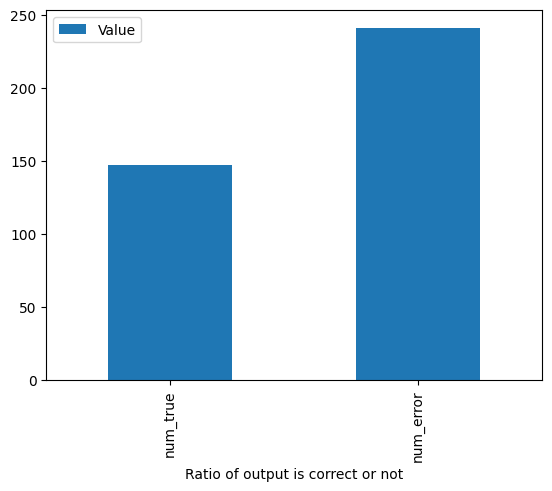

In [11]:
import pandas as pd

data = {'Ratio of output is correct or not': ['num_true', 'num_error'], 'Value': [num_true, num_error]}
df = pd.DataFrame(data)

# Add the length of each column as a new value
df['Length'] = df['Value'].apply(lambda x: len(str(x)))

df.plot(x='Ratio of output is correct or not', y='Value', kind='bar')


<Axes: ylabel='Value'>

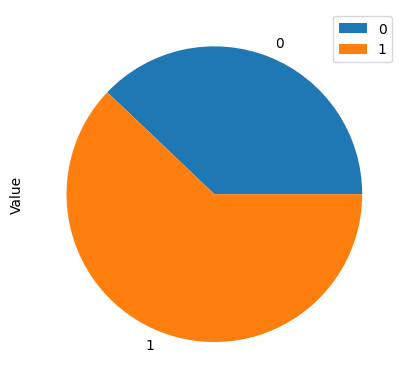

In [5]:
df.plot(x='Variable', y='Value', kind='pie')

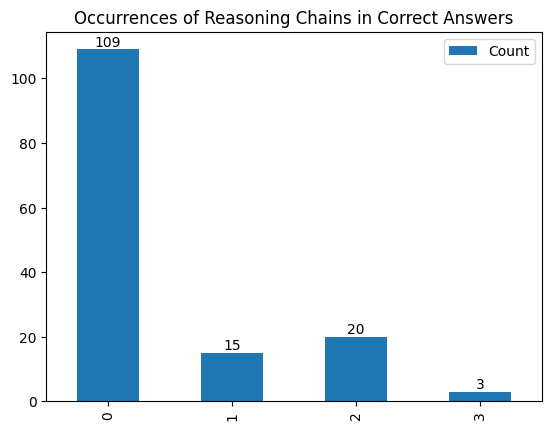

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the occurrences of 0, 1, and 2 in num_chain["true"]
counts = pd.Series(num_chain["true"]).value_counts().sort_index()

# Create a dataframe from the counts
df = pd.DataFrame({'Count': counts})

# Plot the bar chart
ax = df.plot(kind='bar')

# Add the numbers on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Set the title of the plot
ax.set_title('Occurrences of Reasoning Chains in Correct Answers')

# Show the plot
plt.show()


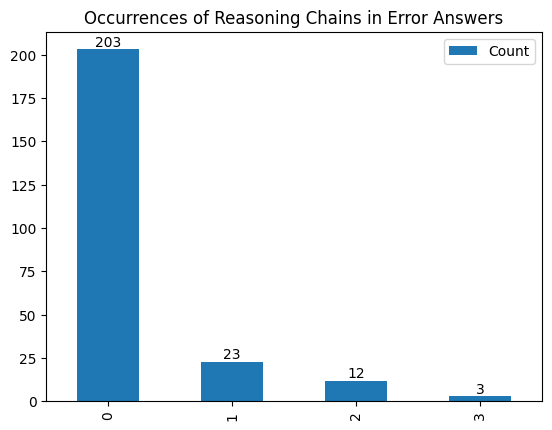

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the occurrences of 0, 1, and 2 in num_chain["true"]
counts = pd.Series(num_chain["error"]).value_counts().sort_index()

# Create a dataframe from the counts
df = pd.DataFrame({'Count': counts})

# Plot the bar chart
ax = df.plot(kind='bar')

# Add the numbers on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Set the title of the plot
ax.set_title('Occurrences of Reasoning Chains in Error Answers')

# Show the plot
plt.show()


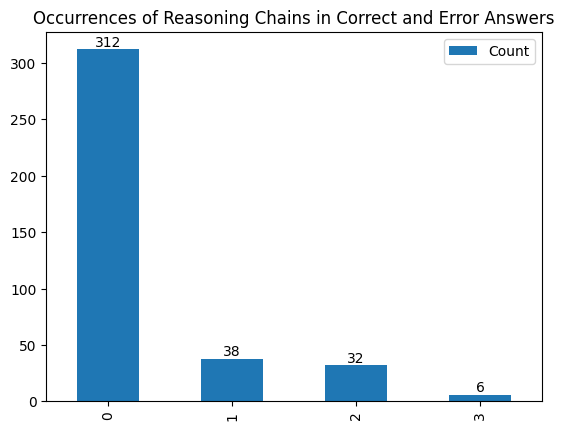

In [8]:
# Count the occurrences of 0, 1, and 2 in num_chain["true"]
counts = pd.Series(num_chain["error"] + num_chain["true"]).value_counts().sort_index()

# Create a dataframe from the counts
combined_df = pd.DataFrame({'Count': counts})

# Plot the bar chart
ax = combined_df.plot(kind='bar')

# Add the numbers on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Set the title of the plot
ax.set_title('Occurrences of Reasoning Chains in Correct and Error Answers')

# Show the plot
plt.show()
